# Importing Libraries

In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf


# Data Analysis

In [2]:
import pathlib
dataset = "C:/Users/INTEL 89/Documents/breast_canacer/DATASET"

In [3]:
dataset

'C:/Users/INTEL 89/Documents/breast_canacer/DATASET'

# Data Preprocessing & Spliting 

In [4]:
batch_size = 32
img_height = 224
img_width = 224

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 664 files belonging to 3 classes.
Using 532 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 664 files belonging to 3 classes.
Using 132 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['Benign', 'Malignant', 'Normal']


# Images & classes visualization 

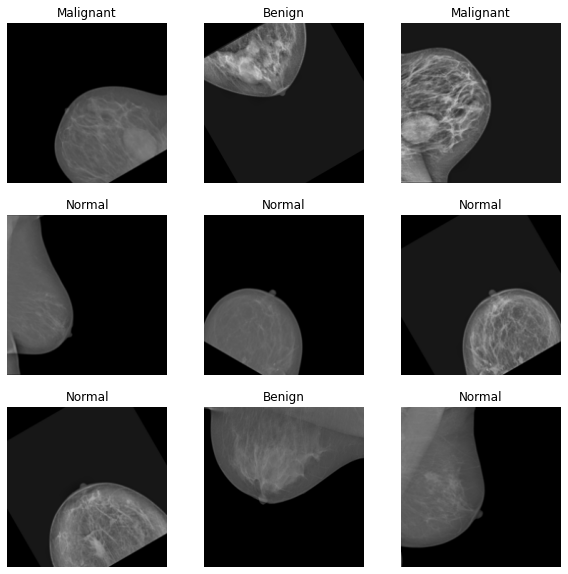

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [10]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

# CNN Model Application

In [11]:
num_classes = 3

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [12]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

# Model Training

In [13]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=25
)

Epoch 1/25
17/17 [==============================] - 25s 1s/step - loss: 1.0580 - accuracy: 0.4323 - val_loss: 0.9065 - val_accuracy: 0.5606
Epoch 2/25
17/17 [==============================] - 23s 1s/step - loss: 0.8673 - accuracy: 0.5752 - val_loss: 0.8120 - val_accuracy: 0.6061
Epoch 3/25
17/17 [==============================] - 23s 1s/step - loss: 0.7262 - accuracy: 0.6805 - val_loss: 0.6716 - val_accuracy: 0.7121
Epoch 4/25
17/17 [==============================] - 23s 1s/step - loss: 0.5459 - accuracy: 0.7876 - val_loss: 0.6552 - val_accuracy: 0.7273
Epoch 5/25
17/17 [==============================] - 23s 1s/step - loss: 0.4045 - accuracy: 0.8402 - val_loss: 0.6454 - val_accuracy: 0.7273
Epoch 6/25
17/17 [==============================] - 23s 1s/step - loss: 0.2999 - accuracy: 0.8985 - val_loss: 0.7817 - val_accuracy: 0.7803
Epoch 7/25
17/17 [==============================] - 25s 1s/step - loss: 0.2385 - accuracy: 0.9041 - val_loss: 0.6991 - val_accuracy: 0.7803
Epoch 8/25
17/17 [==

# Data Ploting

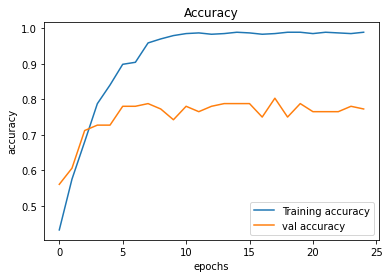

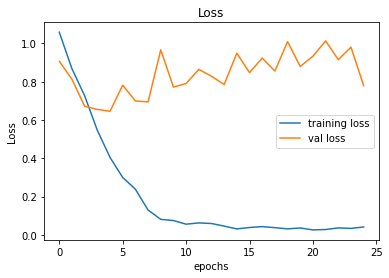

In [14]:
plt.figure(0)
plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="val accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.figure(1)
plt.plot(history.history['loss'], label="training loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Train Model Data Saving

In [15]:
model.save('cancer.h5')

In [ ]:
model.save('keras_model.h5')